In [2]:
import gurobipy
import pandas as pd
from oct import *
import numpy as np
import time
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression


In [15]:

## Create artificial data set with
n = 400
x1 = np.random.normal(loc = 0,scale=1, size=n)
x2 = np.random.normal(loc=0, scale=1, size=n)
x3 = np.random.normal(loc=0, scale=1, size=n)
x4 = np.random.normal(loc=0, scale=1, size=n)
x5 = np.random.normal(loc = 0,scale=1, size=n)
x6 = np.random.normal(loc=0, scale=1, size=n)
x7 = np.random.normal(loc=0, scale=1, size=n)
x8 = np.random.normal(loc=0, scale=1, size=n)

simulated_data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 
                                'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8})

x = simulated_data[[f'x{i}' for i in range(1, 9)]]

orig_cols = simulated_data.columns

scales = np.max(x, axis=0)
scales[scales == 0] = 1
x = x/scales

y = (x1 < 0.3)

y_bar = y

y = y_bar

x = np.array(x)
y = np.array(y)


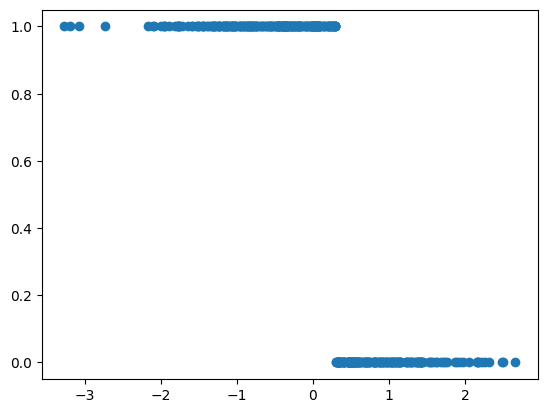

In [16]:
plt.scatter(x1, y)

In [17]:
X_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,-0.000825,-0.003551,-0.004802,0.014906,-0.003906,0.033542,0.000259,0.014093
std,0.384047,0.395336,0.349442,0.346972,0.321910,0.379204,0.325219,0.367692
min,-0.963774,-0.882620,-0.937282,-0.873566,-0.793696,-1.071545,-0.813743,-1.293144
25%,-0.254669,-0.297299,-0.236904,-0.235663,-0.219827,-0.222938,-0.219569,-0.247885
50%,0.009926,0.002406,-0.008513,-0.000543,-0.032322,0.020717,-0.028772,0.008094
75%,0.246361,0.284604,0.236245,0.245748,0.207159,0.271824,0.245998,0.278508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
ORFA = optimalDecisionTreeClassifier(max_depth=2, 
                                     output = False,
                                     warmstart = True,
                                     alpha = 0,
                                     min_samples_split=10
                                     )

In [19]:
t0 = time.time()
# ORFA.fit(X_train, y_train, scaled = True)
ORFA.fit(x, y)
t1 = time.time()
total = t1-t0
print(total)

/Users/ryanlucas/Documents/GitHub/An-Optimal-RuleFit-Algorithm/IORFA/oct.py:196: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(y)[0][0]


37.009668827056885


In [ ]:
ORFA._a

{(0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (2, 1): 1.0,
 (2, 2): -0.0,
 (2, 3): 1.0,
 (3, 1): 0.0,
 (3, 2): 0.0,
 (3, 3): 0.0,
 (4, 1): -0.0,
 (4, 2): -0.0,
 (4, 3): 0.0,
 (5, 1): 0.0,
 (5, 2): 0.0,
 (5, 3): 0.0,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (7, 1): -0.0,
 (7, 2): -0.0,
 (7, 3): -0.0}

In [ ]:
ORFA._b

{1: 0.016080829400303198, 2: 0.0, 3: 0.04135724833136045}

In [ ]:
ORFA._b*ORFA.scales

NameError: name 'ORFA' is not defined

In [ ]:
ORFA.scales

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
splits = ORFA._a

thresholds = ORFA._b

rules = {}

for feature, node in splits:
    if splits[(feature, node)] == 1.0:  # check if split occurs
        rule = f"X_train[X_train['x{feature+1}'] >= {thresholds[node]}]"
        rules[node] = rule

for node, rule in rules.items():
    print(f"For node {node}, rule is: {rule}")


For node 1, rule is: X_train[X_train['x3'] >= 0.016080829400303198]
For node 3, rule is: X_train[X_train['x3'] >= 0.04135724833136045]


In [ ]:
eval(rule)

,x1,x2,x3,x4,x5,x6,x7,x8
336,-0.216948,-0.477637,0.043759,-0.220447,-0.146373,0.400092,0.412870,0.391546
64,-0.299780,-0.115255,0.064629,-0.286280,0.490265,-0.082229,-0.538546,-0.385487
300,0.598310,-0.328580,0.254576,0.332639,-0.038170,0.204314,-0.219900,0.547729
229,-0.300330,-0.024532,0.102760,-0.013981,-0.267492,0.853346,-0.264105,0.181716
122,-0.578234,0.470860,0.308926,0.219912,-0.118658,-0.540278,0.331566,-0.028747
...,...,...,...,...,...,...,...,...
211,-0.132764,0.165463,0.205750,0.483017,-0.147501,-0.468538,0.401110,-0.462471
251,-0.156703,-0.638364,0.337059,0.138549,-0.016700,-0.424481,-0.291284,0.039145
192,-0.412225,-0.547587,0.045993,0.113389,-0.173667,-0.131797,0.468522,0.159251
117,-0.149479,-0.901520,0.078163,-0.166764,-0.003468,0.191037,-0.349714,-0.318887


In [ ]:
import pandas as pd
import numpy as np

# Assuming data is stored in a pandas DataFrame df
data = {
    "x1": [-0.125236, -0.345539, -0.276631, 0.403196, 0.088546],
    "x2": [-0.077308, -0.206044, -0.390471, -0.133247, 0.788166],
    "x3": [-0.235482, -0.335113, -0.021556, -0.186456, -0.348274],
    "x4": [0.056180, -0.186628, -0.734315, 0.368340, -0.402200],
    "x5": [-0.352838, -0.395455, -0.203241, -0.143673, -0.324978],
    "x6": [-0.131503, -0.091411, 0.094781, 0.175195, -0.397078],
    "x7": [0.286796, 0.471552, -0.339024, -0.153172, 0.115189],
    "x8": [0.000088, 0.163754, -0.057540, 0.277387, -0.163212]
}
df = pd.DataFrame(data)

# Apply the decision rules to the data
for node, rule in rules.items():
    X_train[f'Indicator(node_{node})'] = X_train.loc[eval(rule)].index.values


ValueError: Cannot index with multidimensional key

In [ ]:
X_train

,x1
2913,0.179772
3275,2.393948
775,-0.245540
217,0.179288
1245,0.574608
...,...
4931,-1.715224
3264,-1.638162
1653,0.417376
2607,0.284186


In [ ]:
def find_rules_from_node_x(x, odt):

    # Find the active splits (those that are actually used) at the first node
    active_splits_at_node_x =  {i: odt._a[i] for i in list(odt._a.keys()) if (i[1] == x and odt._a[i] == 1)}

    # Store the splitting variable and the threshold together
    for key in list(active_splits_at_node_x.keys()):
        active_splits_at_node_x[(key[0], odt._b[x])] = active_splits_at_node_x[key]
        del active_splits_at_node_x[key]

    # Make rules out of them
    rules_from_node_x = {(f"np.array(X[:, {key[0]}]) <= " + str(key[1]), 
                        f"np.array(X[:, {key[0]}]) > " + str(key[1]) )           
                        for key in active_splits_at_node_x.keys()}
    
    return rules_from_node_x

def chain_rules(odt):
    
    rules_N1 = list(find_rules_from_node_x(1, odt))[0]
    rules_N2 = list(find_rules_from_node_x(2, odt))[0]
    rules_N3 = list(find_rules_from_node_x(3, odt))[0]

    path1 = "(" + rules_N1[0] + ")" + " * " + "(" + (rules_N2[0]) + ")"
    path2 = "(" +(rules_N1[0])+ ")" + " * " + "(" + (rules_N2[1]) + ")"
    path3 = "(" +(rules_N1[1]) + ")" + " * " +  "(" +(rules_N3[0]) + ")"
    path4 = "(" +(rules_N1[1]) + ")" + " * " + "(" +(rules_N3[1]) + ")"


    return [path1, path2, path3, path4]


def add_rules_to_df(rules, X):

    X = np.matrix(X)

    for rule in rules:
        rule_ind = []

        for k in range(X.shape[0]):
            if k in np.where(np.array(eval(rule)).flatten())[0]:
                rule_ind.append(1)
            else:
                rule_ind.append(0)
    
        X = np.hstack((X, np.array(rule_ind).reshape(-1,1)))
    
    return X

def IORFA(X, odt):
    rules = chain_rules(odt)

    betas = [odt.beta[i] for i in list(odt.beta.keys())]
    gammas = [odt.gamma[i] for i in list(odt.gamma.keys())]
    coefficients = betas + gammas
    rule_df = np.matrix(add_rules_to_df(rules, X))

    preds = []
    for i in range(X.shape[0]):
        print(rule_df.shape)

        y_i = sum(rule_df[i, j]*coefficients[j] for j in range(len(coefficients)))
        preds.append(y_i)
    
    return preds, rule_df, coefficients, rules

In [ ]:
np.array(dir(ORFA))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__',
       '__getstate__', '__gt__', '__hash__', '__init__',
       '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__',
       '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__sizeof__', '__str__', '__subclasshook__',
       '__weakref__', '_a', '_b', '_buildMIP', '_c', '_calBaseline',
       '_calMinDist', '_d', '_getRules', '_setStart', 'alpha', 'b_index',
       'fit', 'l_index', 'labels', 'max_depth', 'min_samples_split', 'n',
       'n_index', 'optgap', 'output', 'p', 'predict', 'scales',
       'timelimit', 'trained', 'warmstart'], dtype='<U17')

In [ ]:
y_train_pred, rule_df, coefs, rules = IORFA(X_train, ORFA)

IndexError: list index out of range

In [ ]:
rules

NameError: name 'rules' is not defined

In [ ]:
X_train

,x1,x2,x3,x4,x5,x6,x7,x8
336,-0.950054,-0.377634,-0.045059,-0.769033,1.782327,0.682384,-0.859266,-0.162295
64,0.184232,-0.096542,-1.117782,0.750524,-0.514876,-1.239468,0.196352,-0.089937
55,1.738975,0.240710,-0.307783,-1.074402,0.185107,0.070177,-0.614003,-0.163165
106,1.093515,1.445844,-2.738722,-0.704068,1.250315,0.001292,1.746983,1.452741
300,-0.929255,1.420577,0.518824,-1.991227,-1.881338,-1.592824,0.845423,0.493028
...,...,...,...,...,...,...,...,...
323,-1.000906,0.431450,0.657782,-0.553405,0.711113,1.318853,0.825502,-0.442495
192,0.417839,0.756178,1.376831,-1.898850,0.286766,0.810857,0.932507,-0.912064
117,0.992720,0.712030,1.684280,0.350101,1.171842,-0.808316,0.330210,-0.528138
47,0.777394,-0.472613,-0.091751,0.741335,-2.149669,-1.458938,1.109577,1.627460


In [ ]:
pd.DataFrame(rule_df)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.950054,-0.377634,-0.045059,-0.769033,1.782327,0.682384,-0.859266,-0.162295,1.0,0.0,0.0,0.0
1,0.184232,-0.096542,-1.117782,0.750524,-0.514876,-1.239468,0.196352,-0.089937,1.0,0.0,0.0,0.0
2,1.738975,0.240710,-0.307783,-1.074402,0.185107,0.070177,-0.614003,-0.163165,0.0,0.0,0.0,1.0
3,1.093515,1.445844,-2.738722,-0.704068,1.250315,0.001292,1.746983,1.452741,0.0,0.0,0.0,1.0
4,-0.929255,1.420577,0.518824,-1.991227,-1.881338,-1.592824,0.845423,0.493028,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
315,-1.000906,0.431450,0.657782,-0.553405,0.711113,1.318853,0.825502,-0.442495,0.0,0.0,0.0,1.0
316,0.417839,0.756178,1.376831,-1.898850,0.286766,0.810857,0.932507,-0.912064,0.0,0.0,0.0,1.0
317,0.992720,0.712030,1.684280,0.350101,1.171842,-0.808316,0.330210,-0.528138,0.0,0.0,0.0,1.0
318,0.777394,-0.472613,-0.091751,0.741335,-2.149669,-1.458938,1.109577,1.627460,1.0,0.0,0.0,0.0


In [ ]:
ORFA._a

{(0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (1, 1): 1.0,
 (1, 2): 1.0,
 (1, 3): 1.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 1): -0.0,
 (3, 2): -0.0,
 (3, 3): -0.0,
 (4, 1): -0.0,
 (4, 2): -0.0,
 (4, 3): -0.0,
 (5, 1): -0.0,
 (5, 2): -0.0,
 (5, 3): -0.0,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (7, 1): -0.0,
 (7, 2): -0.0,
 (7, 3): -0.0}

In [ ]:
pd.DataFrame(rules).values

array([['(np.array(X[:, 1]) <= 0.15414366899514073) * (np.array(X[:, 1]) <= 0.14474171614167805)'],
       ['(np.array(X[:, 1]) <= 0.15414366899514073) * (np.array(X[:, 1]) > 0.14474171614167805)'],
       ['(np.array(X[:, 1]) > 0.15414366899514073) * (np.array(X[:, 1]) <= 0.1595797615995948)'],
       ['(np.array(X[:, 1]) > 0.15414366899514073) * (np.array(X[:, 1]) > 0.1595797615995948)']],
      dtype=object)

In [ ]:

print("IN-SAMPLE")
print(r2_score(y_train_pred, y_train))
print("OO-SAMPLE")
y_test_pred, rule_df, coefs, rules = IORFA(X_test, ORFA)
r2_score(y_test_pred, y_test)

IN-SAMPLE
-0.9205578783323098
OO-SAMPLE
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)


-0.8401473524151517

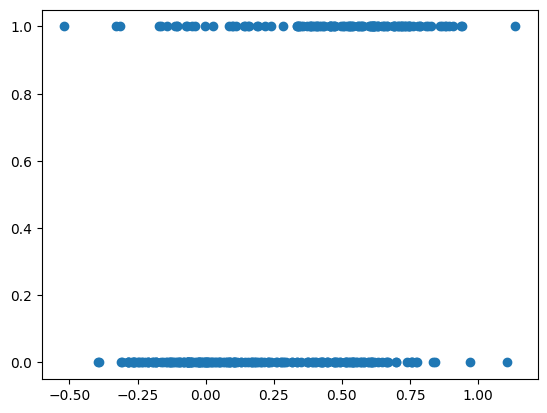

In [ ]:
plt.scatter(y_train_pred, y_train)